# Exercise 1 Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### a) Load first dataset  - Scores

In [101]:
#set pandas to non-scientific format (no ..e-05 values)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

datasetA = pd.read_csv('ex1-system-a.csv',names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetA = datasetA.drop('unused', axis = 1) # drop the last colomn without any information in it.
classes_name = ['0','1','2','3','4','5','6','7','8','9']
nb_classes = 10
datasetA.head(15)

,0,1,2,3,4,5,6,7,8,9,y_true
0,0.00000005,0.00000000,0.00000081,0.00002082,0.00000000,0.00000002,0.00000000,0.99996500,0.00000048,0.00001250,7
1,0.00133427,0.00003203,0.85042800,0.00166909,0.00000015,0.00024129,0.14482800,0.00000000,0.00145633,0.00001063,2
2,0.00000364,0.99627600,0.00204591,0.00042105,0.00002194,0.00001644,0.00028382,0.00037230,0.00051501,0.00004425,1
3,0.99982000,0.00000000,0.00001112,0.00001653,0.00000000,0.00009000,0.00000938,0.00004464,0.00000242,0.00000640,0
4,0.00000002,0.00000007,0.00003561,0.00000055,0.99889600,0.00000003,0.00023462,0.00000097,0.00000107,0.00083150,4
5,0.00000020,0.99932800,0.00013733,0.00009399,0.00000364,0.00000065,0.00000192,0.00026615,0.00016111,0.00000703,1
6,0.00000003,0.00000010,0.00000002,0.00001143,0.99887100,0.00008733,0.00000314,0.00000017,0.00012424,0.00090272,4
7,0.00000007,0.00093408,0.00000220,0.00209113,0.00030578,0.00015507,0.00001132,0.02050920,0.00120465,0.97478700,9
8,0.00375323,0.00013691,0.22098000,0.00000019,0.03931230,0.00040351,0.73518000,0.00000000,0.00023078,0.00000242,5
9,0.00000302,0.00000006,0.00000006,0.00000167,0.00523116,0.00000347,0.00000412,0.05262060,0.00026337,0.94187200,9


In [6]:
y_true = datasetA['y_true'].values
y_scores_A = datasetA[classes_name].values   #isolate the matrix of scores
y_pred_A = np.argmax(y_scores_A,axis=1)      #elect winner class

### b) What is the overall error rate of the system ?

In [63]:
### START YOUR CODE
print(y_true[:1])
overall_rate = 0
for index, row in datasetA.iterrows():
    overall_rate += row[int(row['y_true'])]
overall_rate = overall_rate / len(datasetA)
### END YOUR CODE

print('overall rate of the system : ',overall_rate)

[7]
overall rate of the system :  0.868689202024722


### c) Compute and report the confusion matrix of the system.

We create a second one our selfs and ckeck if it is correct with the "correct" one from sklearn.

In [79]:
def confusion_matrix2(y_true,y_pred,nb_classes):
    """
    Arguments:
    y_true -- groud truth labels
    y_pred -- predicted values
    n_classes -- number of classes
    
    Returns:
    the confusion matrix as 2d numpy array 
    """
    ### START YOUR CODE
    counts = np.zeros((nb_classes, nb_classes))
    for t, p in zip(y_true, y_pred):
        counts[t][p] = counts[t][p] + 1
    ### END YOUR CODE
    print(counts)
    return counts

In [80]:
# TEST - we use the sklearn builit in functionality
from sklearn.metrics import confusion_matrix
verif_cm = confusion_matrix(y_true,y_pred_A)
print(verif_cm)
cm_A = confusion_matrix2(y_true, y_pred_A,nb_classes)
# verification for our confusion matrix function
print((cm_A == verif_cm).sum() == nb_classes**2)

[[ 944    0   11    0    0    2   10    7    5    1]
 [   0 1112    2    3    1    4    3    1    9    0]
 [  10    6  921   12   15    3   19   15   26    5]
 [   1    1   31  862    2   72    5   14   12   10]
 [   2    3    6    2  910    1   12    6    4   36]
 [  12    3    6   29   19  768   19    9   21    6]
 [  14    3   21    2   22   28  865    0    3    0]
 [   0   14   30    9    7    2    1  929    3   33]
 [  12   16   18   26   24   46   22   19  772   19]
 [  10    4    6   22   53   18    0   48    4  844]]
[[9.440e+02 0.000e+00 1.100e+01 0.000e+00 0.000e+00 2.000e+00 1.000e+01
  7.000e+00 5.000e+00 1.000e+00]
 [0.000e+00 1.112e+03 2.000e+00 3.000e+00 1.000e+00 4.000e+00 3.000e+00
  1.000e+00 9.000e+00 0.000e+00]
 [1.000e+01 6.000e+00 9.210e+02 1.200e+01 1.500e+01 3.000e+00 1.900e+01
  1.500e+01 2.600e+01 5.000e+00]
 [1.000e+00 1.000e+00 3.100e+01 8.620e+02 2.000e+00 7.200e+01 5.000e+00
  1.400e+01 1.200e+01 1.000e+01]
 [2.000e+00 3.000e+00 6.000e+00 2.000e+00 9.100e+

Now we want to plot the confusion matrix.

In [81]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

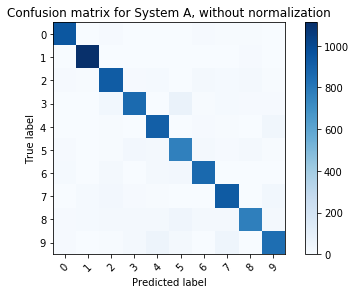

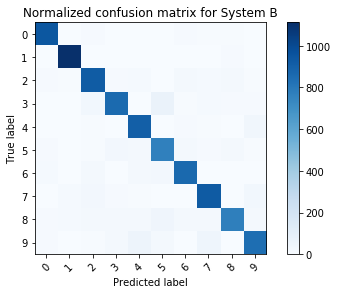

In [82]:
plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name,title='Confusion matrix for System A, without normalization')

plt.figure()
plot_confusion_matrix(cm_A, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')

plt.show()

### d) What are the worst and best classes in terms of sensitivity (recall) ?

In [105]:
def recall_per_class(cm):
    """
    Aguments:
    cm -- confusion matrix
    Returns:
    Recall per class, i.e. a numpy array of length given by the number of classes
    """
    ### START YOUR CODE  
    tp = 0
    fp = 0
    recalls = []
    for idx, row in enumerate(cm):
        tp += row[idx]
        fp += (np.sum(row) - row[idx])
        recalls.append(row[idx] / np.sum(row))
    return recalls
    ### END YOUR CODE

In [106]:
recalls = recall_per_class(cm_A)
# should return '1' as best (97.97%)
# and '8' as worst (79.26%) 

best_class = np.argmax(recalls)
worst_class = np.argmin(recalls)
print('best class : ',best_class,'[',recalls[best_class],']')
print('worst class : ',worst_class,'[',recalls[worst_class],']')
print(recalls)

best class :  1 [ 0.9797356828193833 ]
worst class :  8 [ 0.7926078028747433 ]
[0.963265306122449, 0.9797356828193833, 0.8924418604651163, 0.8534653465346534, 0.9266802443991853, 0.8609865470852018, 0.9029227557411273, 0.9036964980544747, 0.7926078028747433, 0.8364717542120912]


### e) Load second dataset  - Scores

Find the output of a second system B. It contains the same ground truth values - but different predictions.
What is the best system between (a) and (b) in terms of error rate and F1.

In [107]:
datasetB = pd.read_csv('ex1-system-b.csv',names=['0','1','2','3','4','5','6','7','8','9','y_true','unused'], sep = ";")
datasetB = datasetB.drop('unused', axis = 1) # drop the last colomn without any information in it.
datasetB.head()

,0,1,2,3,4,5,6,7,8,9,y_true
0,0.00000000,0.00000000,0.00000018,0.00001230,0.00000000,0.00000000,0.00000000,0.99998700,0.00000000,0.00000000,7
1,0.00000002,0.00000108,0.99997000,0.00002766,0.00000000,0.00000000,0.00000159,0.00000000,0.00000016,0.00000000,2
2,0.00000001,0.99971500,0.00022315,0.00000652,0.00000048,0.00000013,0.00000217,0.00001417,0.00003834,0.00000006,1
3,0.99998600,0.00000000,0.00000903,0.00000001,0.00000000,0.00000000,0.00000115,0.00000392,0.00000000,0.00000005,0
4,0.00000001,0.00000000,0.00000032,0.00000000,0.99961500,0.00000001,0.00000028,0.00000240,0.00000002,0.00038205,4


[[9.630e+02 0.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 6.000e+00
  2.000e+00 2.000e+00 0.000e+00]
 [0.000e+00 1.123e+03 3.000e+00 1.000e+00 0.000e+00 0.000e+00 5.000e+00
  1.000e+00 2.000e+00 0.000e+00]
 [5.000e+00 0.000e+00 9.960e+02 7.000e+00 4.000e+00 0.000e+00 4.000e+00
  8.000e+00 6.000e+00 2.000e+00]
 [0.000e+00 0.000e+00 1.300e+01 9.850e+02 0.000e+00 3.000e+00 1.000e+00
  3.000e+00 3.000e+00 2.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 0.000e+00 9.380e+02 1.000e+00 9.000e+00
  2.000e+00 5.000e+00 2.000e+01]
 [8.000e+00 1.000e+00 0.000e+00 2.700e+01 1.000e+00 8.300e+02 1.200e+01
  1.000e+00 8.000e+00 4.000e+00]
 [6.000e+00 3.000e+00 2.000e+00 1.000e+00 7.000e+00 4.000e+00 9.300e+02
  1.000e+00 4.000e+00 0.000e+00]
 [0.000e+00 7.000e+00 1.800e+01 1.000e+01 3.000e+00 1.000e+00 0.000e+00
  9.810e+02 0.000e+00 8.000e+00]
 [7.000e+00 1.000e+00 7.000e+00 1.900e+01 5.000e+00 7.000e+00 4.000e+00
  7.000e+00 9.120e+02 5.000e+00]
 [3.000e+00 4.000e+00 1.000e+00 1.400e+01 1.100e+01 6.0

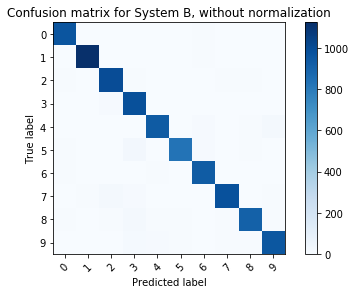

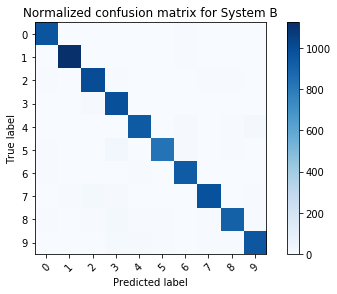

In [108]:
y_true = datasetB['y_true'].values
y_scores_B = datasetB[classes_name].values   #isolate the matrix of scores
y_pred_B = np.argmax(y_scores_B,axis=1)      #elect winner class

cm_B = confusion_matrix2(y_true,y_pred_B,nb_classes)

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name,title='Confusion matrix for System B, without normalization')

plt.figure()
plot_confusion_matrix(cm_B, classes=classes_name, normalize=True,
                      title='Normalized confusion matrix for System B')


plt.show()

In [177]:
from sklearn.metrics import precision_recall_fscore_support
#m = np.matrix('98, 1, 1;2, 96, 2;2, 3, 95')
#print(np.array(m))
#print(tp_fn_fp(np.array(m)))

def tp_fn_fp(cm):
    tp = 0
    fn = 0
    fp = 0
    for idx in range(0, len(cm)):
        tp += cm[idx][idx]
        fn += np.sum(cm[idx]) - cm[idx][idx]
        fp += np.sum(cm.T[idx]) - cm.T[idx][idx]
    return tp, fn, fp

def system_precision(cm):
    ### START YOUR CODE
    tp, fn, fp = tp_fn_fp(cm)
    print(tp, fn, fp)
    return tp / (tp+fp)
    ### END YOUR CODE

def system_recall(cm):
    ### START YOUR CODE
    tp, fn, fp = tp_fn_fp(cm)
    return tp / (tp+fn)
    ### END YOUR CODE
    
def system_accuracy(cm):
    ### START YOUR CODE
    tp, fn, fp = tp_fn_fp(cm)
    return tp
    ### END YOUR CODE
    
def system_f1_score(cm):
    ### START YOUR CODE
    p = system_precision(cm)
    r = system_recall(cm)
    return 2*p*r / (p+r)
    ### END YOUR CODE

[[98  1  1]
 [ 2 96  2]
 [ 2  3 95]]
(289, 11, 11)


In [178]:
print('System A\n\trecall : ',system_recall(cm_A),'\n\tprecision : ',system_precision(cm_A),'\n\taccuracy : ',system_accuracy(cm_A),'\n\tf1-score : ',system_f1_score(cm_A))
print('System B\n\trecall : ',system_recall(cm_B),'\n\tprecision : ',system_precision(cm_B),'\n\taccuracy : ',system_accuracy(cm_B),'\n\tf1-score : ',system_f1_score(cm_B))


print('precision_recall_fscore_support A', precision_recall_fscore_support(y_true, y_pred_A, average='micro'))
print('precision_recall_fscore_support B', precision_recall_fscore_support(y_true, y_pred_B, average='micro'))

8927.0 1073.0 1073.0
8927.0 1073.0 1073.0
System A
	recall :  0.8927 
	precision :  0.8927 
	accuracy :  8927.0 
	f1-score :  0.8927
9613.0 387.0 387.0
9613.0 387.0 387.0
System B
	recall :  0.9613 
	precision :  0.9613 
	accuracy :  9613.0 
	f1-score :  0.9613
precision_recall_fscore_support A (0.8927, 0.8927, 0.8927, None)
precision_recall_fscore_support B (0.9613, 0.9613, 0.9613, None)
